In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines
import os
from IPython.display import display
import networkx as nx
import statistics
import scipy.stats as st
from sklearn.metrics import jaccard_score
from scipy import stats
from scipy.stats import zscore

In [2]:
df_martix = pd.read_csv('./study_data/cities_gzh_aja_martix.csv')
df_citys = pd.read_csv('./study_data/sa340.csv')
df_martix.set_index('city', inplace=True)
rank = pd.read_csv('./study_data/score/城市信息+排名得分综合表.csv')
# 可视化配置
fontdict = {'weight': 600, 'size':12}

# 1. Correlation between CII and GDP

In [58]:
df_GDP = pd.read_csv('./study_data/2022GDP_clean_data.csv')
df_gdp_score = pd.merge(rank, df_GDP, on='name')

def show_score_gdp_correlation(socre_type):
    print(socre_type) 
    g = sns.JointGrid(data=df_gdp_score, x=socre_type, y='gdp', space=0, ratio=10)
    g.plot_joint(sns.scatterplot, size=df_gdp_score["gdp"] , sizes=(5, 120), color="g", alpha=.7, legend=False)
    g.plot_joint(sns.regplot, order=2, color="#ED6168", scatter=False)
    g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)
    g.set_axis_labels(xlabel='CII Score of City', ylabel='GDP of City', fontdict={'weight': 600, 'size':12})
    g.fig.savefig('./study_data/figs/CII_GDP_' + socre_type + '.pdf', dpi=600, bbox_inches = 'tight')
    
   
    _CII = np.log(list(df_gdp_score[socre_type]))
    _GDP = np.log(list(df_GDP['gdp']))
    pearson_corr, _ = st.pearsonr(_CII, _GDP)
    print('pearson_corr', pearson_corr)
    print(_)
    
def show_QQ(data):
    plt.figure(figsize=(8, 6))
    stats.probplot(data, dist="norm", plot=plt)
    plt.show()

In [59]:
df_GDP

,name,gdp
0,北京市,41610.90
1,天津市,16311.34
2,石家庄市,7100.60
3,唐山市,8900.70
4,秦皇岛市,1909.52
...,...,...
269,安康市,1268.65
270,海东市,562.79
271,海西蒙古族藏族自治州,842.55
272,昌吉回族自治州,2169.52


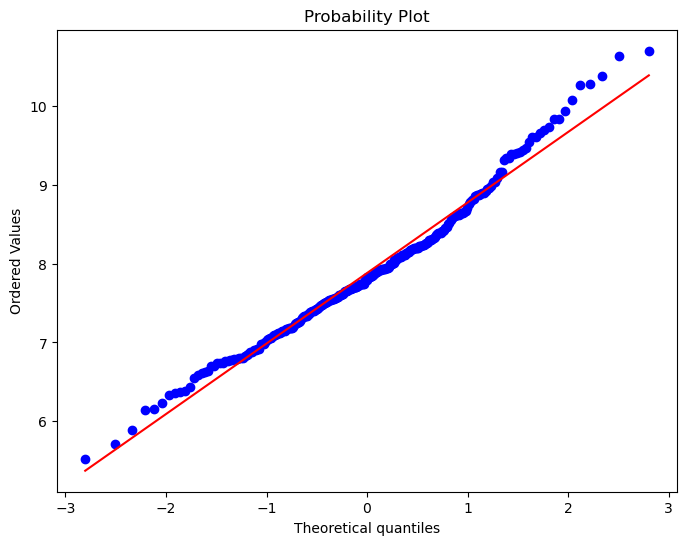

In [60]:
gdp_n_n = np.log(list(df_GDP['gdp']))
show_QQ(gdp_n_n)

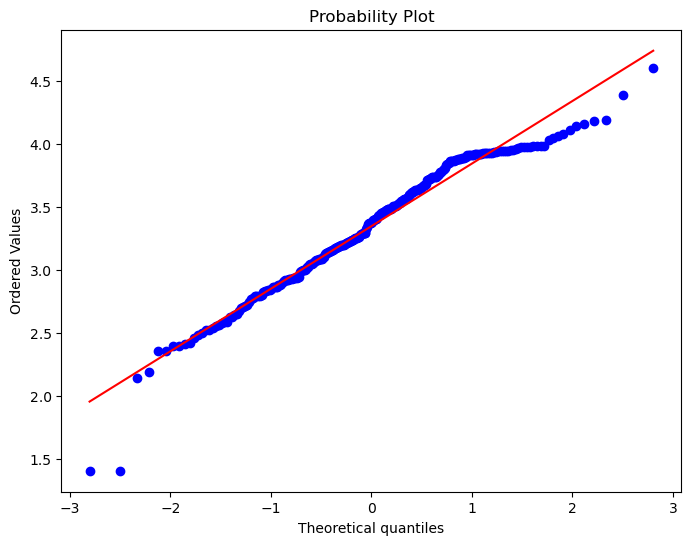

In [61]:
CII_n_n = np.log(list(df_gdp_score['ARI']))
show_QQ(CII_n_n)

ARI


/Users/wanglihua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/wanglihua/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


pearson_corr 0.36450178966038504
4.929351672907658e-10


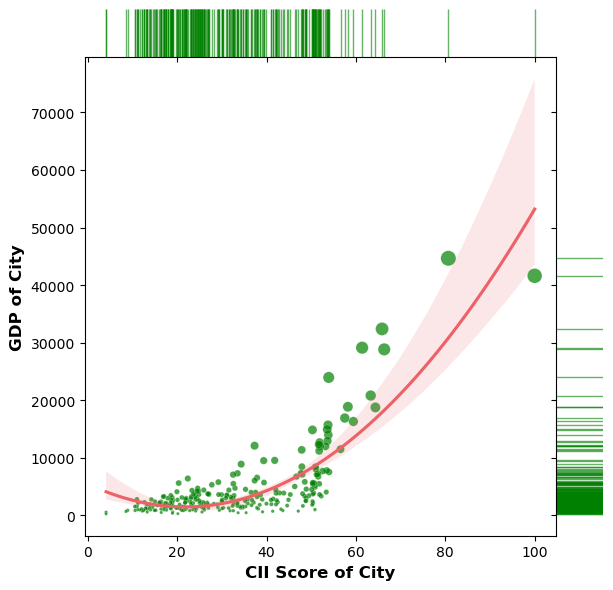

In [48]:
show_score_gdp_correlation('ARI')

# 2. Top 50 cities

In [6]:
# 按照不同分数进行排名
def show_top_50_citys(score_type):
    data = []
    print('======={}======'.format(score_type))
    df_top50 = rank.sort_values(by=score_type, ascending=False)
    df_top50 = df_top50.reset_index(drop=True)
    df_top50 = df_top50[0:100]
    df_top50['rank'] = df_top50.index + 1
    for i, row in df_top50.iterrows():
        r_num = round(row[score_type], 2)
        score = '{:.2f}'.format(r_num)
        data.append([row['rank'], row['name'], row['en_name'], score, row['in_citation']])
    return pd.DataFrame(data, columns=['rank', 'name', 'en_name', 'score', 'citation'])

In [7]:
show_top_50_citys('ARI')

=======ARI======


,rank,name,en_name,score,citation
0,1,北京市,Beijing,100.00,36899
1,2,上海市,Shanghai,80.68,22841
2,3,广州市,Guangzhou,66.33,12751
3,4,深圳市,Shenzhen,65.85,11783
4,5,杭州市,Hangzhou,64.35,10219
...,...,...,...,...,...
95,96,梅州市,Meizhou,37.85,1012
96,97,陇南市,Longnan,37.67,1167
97,98,九江市,Jiujiang,37.54,1045
98,99,台州市,Taizhou,37.33,688


In [8]:
df_top100 = show_top_50_citys('ARI')
df_top100 = df_top100[['rank', 'en_name', 'score', 'citation']]

t_left = df_top100[0:25]
t_right = df_top100[25:50]

temp = pd.DataFrame()
temp['rank1'] = list(t_left['rank'])
temp['en_name1'] = list(t_left['en_name'])
temp['score1'] = list(t_left['score'])
temp['citation1'] = list(t_left['citation'])

temp['rank2'] = list(t_right['rank'])
temp['en_name2'] = list(t_right['en_name'])
temp['score2'] = list(t_right['score'])
temp['citation2'] = list(t_right['citation'])

temp.to_csv('./study_data/table/top50_cities.csv', index=None)
temp

=======ARI======


,rank1,en_name1,score1,citation1,rank2,en_name2,score2,citation2
0,1,Beijing,100.00,36899,26,Jinan,52.00,2454
1,2,Shanghai,80.68,22841,27,Zhongshan,51.87,2269
2,3,Guangzhou,66.33,12751,28,Foshan,51.86,2577
3,4,Shenzhen,65.85,11783,29,Harbin,51.79,3010
4,5,Hangzhou,64.35,10219,30,Dongguan,51.77,2341
5,6,Hong Kong,64.01,9056,31,Fuzhou,51.70,2430
6,7,Chengdu,63.30,11564,32,Changchun,51.56,2926
7,8,Chongqing,61.38,9749,33,Nanchang,51.53,2594
8,9,Tianjin,59.42,6461,34,Shijiazhuang,51.26,2122
9,10,Wuhan,58.20,7633,35,Wenzhou,51.05,1765


## CII score statistics

In [9]:
scores = list(rank['ARI'])
print('平均分：', np.mean(scores))
print('中位数：', np.median(scores))

平均分： 29.577593646081006
中位数： 25.479057906854493


In [10]:
rank[rank.ARI < np.mean(scores)]

,citycode,adcode,name,level,center,pro_name,pro_adcode,gzh,city_shortname,pro_shortname,...,citation_score,pagerank_value,pagerank_rank,importance_score,pagerank_score,Longitude,Latitude,ARI,GEO,HAR
143,835,511800,雅安市,city,"103.041538,30.009998",四川省,510000,四川雅安,雅安,四川,...,31.592251,0.157359,161,27.251001,27.251001,103.041538,30.009998,29.421626,29.341446,29.261485
144,546,370500,东营市,city,"118.674633,37.433992",山东省,370000,东营发布,东营,山东,...,25.676121,0.190228,122,32.838698,32.838698,118.674633,37.433992,29.257410,29.037396,28.819038
145,539,371300,临沂市,city,"118.356464,35.103771",山东省,370000,临沂发布,临沂,山东,...,25.084508,0.193040,117,33.316843,33.316843,118.356464,35.103771,29.200676,28.909110,28.620455
146,826,511600,广安市,city,"106.632647,30.456354",四川省,510000,广安发布,广安,四川,...,28.594745,0.171226,145,29.608387,29.608387,106.632647,30.456354,29.101566,29.097152,29.092739
147,335,130300,秦皇岛市,city,"119.52022,39.888243",河北省,130000,秦皇岛发布,秦皇岛,河北,...,23.506873,0.199254,109,34.373180,34.373180,119.520220,39.888243,28.940027,28.425446,27.920015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
335,2898,460300,三沙市,city,"112.338649,16.831004",海南省,460000,中国三沙,三沙,海南,...,2.327127,0.054463,336,9.758726,9.758726,112.338649,16.831004,6.042927,4.765480,3.758079
336,972,630200,海东市,city,"102.41064,36.473448",青海省,630000,海东市政府网,海东市,青海,...,0.000116,0.045041,337,8.156901,8.156901,102.410640,36.473448,4.078509,0.030761,0.000232
337,894,540400,林芝市,city,"94.361436,29.64875",西藏自治区,540000,林芝发布,林芝市,西藏,...,0.000116,0.045041,338,8.156901,8.156901,94.361436,29.648750,4.078509,0.030761,0.000232
338,886,533300,怒江傈僳族自治州,city,"98.8566,25.817555",云南省,530000,怒江发布,怒江市,云南,...,0.000116,0.045041,339,8.156901,8.156901,98.856600,25.817555,4.078509,0.030761,0.000232
